# Process data and compare populations.
(for now just histograms)

###### Import libraries and imported data from last program

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset 09 and 15 is the same.
# messed up export

df15 = pd.read_pickle('Ref15_merged')
#df09 = pd.read_pickle('Ref09_merged') 
df09=pd.read_pickle('Ref09_merged_temp')
df09['surv_year']='2009' 

#print(df09['surv_year'].head())


In [4]:
# combine two years into one dataset

frames = [df09, df15]
df_2y = pd.concat(frames)

#### Recode vars:  

In [6]:
'''
1. Create main analysis variable:  Unemployment classification: employed, long-term unemployed, short-term unemployed
1. Change format to numeric so we can analyze we will use in analysis
2. Rename analysis variables to more easily understand in later anlaysis
'''

df_2y['UnempWks'] = df_2y['nwlkwk'].astype('float')


# create new variables
# Create Long Term Unemployed variable to compare populations

# If, then data processing.  best way?
df_2y['LTunemp'] = np.where(df_2y['UnempWks']>=27, 'yes', 'no')
df_2y['LTunempN'] = np.where(df_2y['UnempWks']>=27, 1, 0)



# later see if you can assign with diff vars
df_2y.loc[df_2y['UnempWks'] >=27,'Emp_Group2'] = 'LongTerm'
df_2y.loc[(df_2y['UnempWks'] <27) & (df_2y['UnempWks'] >=1),'Emp_Group2'] = 'ShortTerm'
df_2y.loc[df_2y['UnempWks'] ==0,'Emp_Group2'] = 'Emped'



# check for outliers and missing or wierd values
#df_2y.loc[df_2y['UnempWks'].isna,'Emp_Group2'] = pd.isna
#df_2y.describe()


In [8]:

'''
1. Change format to numeric so we can analyze we will use in analysis
2. Rename analysis variables to more easily understand in later anlaysis
'''

# 1.1. Rename family numeric variables

df_2y['NumPerFam']=df_2y['fpersons']
df_2y['wagesFamInc']=df_2y['fwsval']
df_2y['FoodStmpAmt']=df_2y['f_mv_fs']
df_2y['SchoolLunAmt']=df_2y['f_mv_sl']
df_2y['HealthPrem']=df_2y['fhip_val']
df_2y['HealthOutPock']=df_2y['fmoop']

In [9]:
# 1.2.  Rename and reformat (convert dtype to str) Numeric fam variables


df_2y['FamType'] = df_2y['ftype'].astype('str')
df_2y['ChildLesTh6'] = df_2y['fownu6'].astype('str')
df_2y['RelChildLesTh6'] = df_2y['frelu6'].astype('str')
df_2y['RelChildLesTh18'] = df_2y['frelu18'].astype('str')
df_2y['IncPercntFam'] = df_2y['fpctcut'].astype('str')
df_2y['FamIncVsPov'] = df_2y['famlis'].astype('str')

# yes no dummie vars.  do they receive $$ from these sources
# are continuous a better choice?
df_2y['wages'] = df_2y['finc_ws'].astype('str')
df_2y['UnempComp'] = df_2y['finc_uc'].astype('str')
df_2y['WorkComp'] = df_2y['finc_wc'].astype('str')
df_2y['welfare'] = df_2y['finc_paw'].astype('str')
df_2y['VetBen'] = df_2y['finc_vet'].astype('str')
df_2y['DisabBen'] = df_2y['finc_dis'].astype('str')
df_2y['ChildSup'] = df_2y['finc_csp'].astype('str')

In [10]:
# 1.3. Recode values of family categorical variables (for format and analysis)

df_2y.loc[df_2y['FamType'] == '1', 'FamType2'] = "Primary family"
df_2y.loc[df_2y['FamType'] == '2', 'FamType2'] = "Nonfamily householder"
df_2y.loc[df_2y['FamType'] == '3', 'FamType2'] = "Related subfamily"
df_2y.loc[df_2y['FamType'] == '4', 'FamType2'] = "Unrelated subfamily"
df_2y.loc[df_2y['FamType'] == '5', 'FamType2'] = "Secondary individual"
df_2y.loc[df_2y['ChildLesTh6'] == '0.0', 'ChildLesTh62'] = "None, not in universe"
df_2y.loc[df_2y['ChildLesTh6'] == '1.0', 'ChildLesTh62'] = "1"
df_2y.loc[df_2y['ChildLesTh6'] == '2.0', 'ChildLesTh62'] = "2"
df_2y.loc[df_2y['ChildLesTh6'] == '3.0', 'ChildLesTh62'] = "3"
df_2y.loc[df_2y['ChildLesTh6'] == '4.0', 'ChildLesTh62'] = "4"
df_2y.loc[df_2y['ChildLesTh6'] == '5.0', 'ChildLesTh62'] = "5"
df_2y.loc[df_2y['ChildLesTh6'] == '6.0', 'ChildLesTh62'] = "6+"
df_2y.loc[df_2y['RelChildLesTh6'] == '3.0', 'RelChildLesTh62'] = "3"
df_2y.loc[df_2y['RelChildLesTh6'] == '4.0', 'RelChildLesTh62'] = "4"
df_2y.loc[df_2y['RelChildLesTh6'] == '5.0', 'RelChildLesTh62'] = "5"
df_2y.loc[df_2y['RelChildLesTh6'] == '6.0', 'RelChildLesTh62'] = "6"
df_2y.loc[df_2y['RelChildLesTh6'] == '7.0', 'RelChildLesTh62'] = "7"
df_2y.loc[df_2y['RelChildLesTh6'] == '8.0', 'RelChildLesTh62'] = "8"
df_2y.loc[df_2y['RelChildLesTh6'] == '9.0', 'RelChildLesTh62'] = "9+"
df_2y.loc[df_2y['RelChildLesTh18'] == '0.0', 'RelChildLesTh182'] = "NIU (FTYPE=2+)"
df_2y.loc[df_2y['RelChildLesTh18'] == '1.0', 'RelChildLesTh182'] = "Lowest 5 percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '2.0', 'RelChildLesTh182'] = "Second 5 percent "
df_2y.loc[df_2y['RelChildLesTh18'] == '3.0', 'RelChildLesTh182'] = "3rd percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '4.0', 'RelChildLesTh182'] = "4th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '5.0', 'RelChildLesTh182'] = "5th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '6.0', 'RelChildLesTh182'] = "6th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '7.0', 'RelChildLesTh182'] = "7th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '8.0', 'RelChildLesTh182'] = "8th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '9.0', 'RelChildLesTh182'] = "9th percent"
df_2y.loc[df_2y['IncPercntFam'] == '10.0', 'IncPercntFam2'] = "10th percent"
df_2y.loc[df_2y['IncPercntFam'] == '11.0', 'IncPercntFam2'] = "11th percent"
df_2y.loc[df_2y['IncPercntFam'] == '12.0', 'IncPercntFam2'] = "12th percent"
df_2y.loc[df_2y['IncPercntFam'] == '13.0', 'IncPercntFam2'] = "13th percent"
df_2y.loc[df_2y['IncPercntFam'] == '14.0', 'IncPercntFam2'] = "14th percent"
df_2y.loc[df_2y['IncPercntFam'] == '15.0', 'IncPercntFam2'] = "15th percent"
df_2y.loc[df_2y['IncPercntFam'] == '16.0', 'IncPercntFam2'] = "16th percent"
df_2y.loc[df_2y['IncPercntFam'] == '17.0', 'IncPercntFam2'] = "17th percent"
df_2y.loc[df_2y['IncPercntFam'] == '18.0', 'IncPercntFam2'] = "18th percent"
df_2y.loc[df_2y['IncPercntFam'] == '19.0', 'IncPercntFam2'] = "19th percent"
df_2y.loc[df_2y['IncPercntFam'] == '20.0', 'IncPercntFam2'] = "Top 5 percent"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Below low-income level"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "100 - 124 percent of the low- income level"
df_2y.loc[df_2y['IncPercntFam'] == '3.0', 'IncPercntFam2'] = "125 - 149 percent of the low- income level"
df_2y.loc[df_2y['IncPercntFam'] == '4.0', 'IncPercntFam2'] = "150 percent and above the low-income level"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Yes"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "No Dollar amount"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Yes"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "No"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Yes"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "No"
df_2y.loc[df_2y['FamIncVsPov'] == '1.0', 'FamIncVsPov2'] = "Yes"
df_2y.loc[df_2y['FamIncVsPov'] == '2.0', 'FamIncVsPov2'] = "No"
df_2y.loc[df_2y['FamIncVsPov'] == '1.0', 'FamIncVsPov2'] = "Yes"
df_2y.loc[df_2y['FamIncVsPov'] == '2.0', 'FamIncVsPov2'] = "No"



In [11]:
## These look/act like numeric vaariables.
# 1.X??
'''
df_2y.loc[df_2y['wages'] == '.0', 'wages2'] = "Wage and salary"
df_2y.loc[df_2y['wages'] == '.0', 'wages2'] = "Wage and salary"
df_2y.loc[df_2y['UnempComp'] == '.0', 'UnempComp2'] = "Unemployment compensation"
df_2y.loc[df_2y['UnempComp'] == '.0', 'UnempComp2'] = "Unemployment compensation"
df_2y.loc[df_2y['WorkComp'] == '.0', 'WorkComp2'] = "Worker's compensation"
df_2y.loc[df_2y['WorkComp'] == '.0', 'WorkComp2'] = "Worker's compensation"
df_2y.loc[df_2y['welfare'] == '.0', 'welfare2'] = "Public assistance or welfare benefits"
df_2y.loc[df_2y['welfare'] == '.0', 'welfare2'] = "Public assistance or welfare benefits"
df_2y.loc[df_2y['VetBen'] == '.0', 'VetBen2'] = "Veterans' Benefits"
df_2y.loc[df_2y['VetBen'] == '.0', 'VetBen2'] = "Veterans' Benefits"
df_2y.loc[df_2y['DisabBen'] == '.0', 'DisabBen2'] = "Disability payments"
df_2y.loc[df_2y['DisabBen'] == '.0', 'DisabBen2'] = "Disability payments"
df_2y.loc[df_2y['ChildSup'] == '.0', 'ChildSup2'] = "Child support payments"
df_2y.loc[df_2y['ChildSup'] == '.0', 'ChildSup2'] = "Child support payments"

'''

'\ndf_2y.loc[df_2y[\'wages\'] == \'.0\', \'wages2\'] = "Wage and salary"\ndf_2y.loc[df_2y[\'wages\'] == \'.0\', \'wages2\'] = "Wage and salary"\ndf_2y.loc[df_2y[\'UnempComp\'] == \'.0\', \'UnempComp2\'] = "Unemployment compensation"\ndf_2y.loc[df_2y[\'UnempComp\'] == \'.0\', \'UnempComp2\'] = "Unemployment compensation"\ndf_2y.loc[df_2y[\'WorkComp\'] == \'.0\', \'WorkComp2\'] = "Worker\'s compensation"\ndf_2y.loc[df_2y[\'WorkComp\'] == \'.0\', \'WorkComp2\'] = "Worker\'s compensation"\ndf_2y.loc[df_2y[\'welfare\'] == \'.0\', \'welfare2\'] = "Public assistance or welfare benefits"\ndf_2y.loc[df_2y[\'welfare\'] == \'.0\', \'welfare2\'] = "Public assistance or welfare benefits"\ndf_2y.loc[df_2y[\'VetBen\'] == \'.0\', \'VetBen2\'] = "Veterans\' Benefits"\ndf_2y.loc[df_2y[\'VetBen\'] == \'.0\', \'VetBen2\'] = "Veterans\' Benefits"\ndf_2y.loc[df_2y[\'DisabBen\'] == \'.0\', \'DisabBen2\'] = "Disability payments"\ndf_2y.loc[df_2y[\'DisabBen\'] == \'.0\', \'DisabBen2\'] = "Disability payments"\

In [12]:
# 2.1. Rename haus numeric variables

df_2y['Wages']=df_2y['hwsval']
df_2y['Uiearn']=df_2y['hucval']
df_2y['WorkComp']=df_2y['hwcval']
df_2y['ssSocSec']=df_2y['hssval']
df_2y['SuppInc']=df_2y['hssival']
df_2y['PubAsst']=df_2y['hpawval']
df_2y['VetPay']=df_2y['hvetval']
df_2y['survivorPay']=df_2y['hsurval']
df_2y['diabPay']=df_2y['hdisval']
df_2y['RetireInc']=df_2y['hretval']
df_2y['InterestInc']=df_2y['hintval']
df_2y['DivInc']=df_2y['hdivval']
df_2y['EdInc']=df_2y['hedval']
df_2y['ChSupp']=df_2y['hcspval']
df_2y['FinAssInc']=df_2y['hfinval']
df_2y['OthInc']=df_2y['hoival']




# recode haus numeric (rename and convert dtype to str)
# 2.2.  Rename and reformat (convert dtype to str) Numeric fam variables

df_2y['Wages'] = df_2y['hwsval'].astype('str')
df_2y['Uiearn'] = df_2y['hucval'].astype('str')
df_2y['WorkComp'] = df_2y['hwcval'].astype('str')
df_2y['ssSocSec'] = df_2y['hssval'].astype('str')
df_2y['SuppInc'] = df_2y['hssival'].astype('str')
df_2y['PubAsst'] = df_2y['hpawval'].astype('str')
df_2y['VetPay'] = df_2y['hvetval'].astype('str')
df_2y['survivorPay'] = df_2y['hsurval'].astype('str')
df_2y['diabPay'] = df_2y['hdisval'].astype('str')
df_2y['RetireInc'] = df_2y['hretval'].astype('str')
df_2y['InterestInc'] = df_2y['hintval'].astype('str')
df_2y['DivInc'] = df_2y['hdivval'].astype('str')
df_2y['EdInc'] = df_2y['hedval'].astype('str')
df_2y['ChSupp'] = df_2y['hcspval'].astype('str')
df_2y['FinAssInc'] = df_2y['hfinval'].astype('str')
df_2y['OthInc'] = df_2y['hoival'].astype('str')



In [13]:
# 2.3. Recode values of family categorical variables (for format and analysis)
# recode haus categorical more makes sense


#df_2y['MetroSize'] = df_2y['gtcbsasz'].astype('str')


df_2y['hausHldTyp1'] = df_2y['h_type'].astype('str')
df_2y['LivPlaceType'] = df_2y['h_livqrt'].astype('str')
df_2y['CountyFIPS'] = df_2y['gtco'].astype('str')
df_2y['City'] = df_2y['gtindvpc'].astype('str')
df_2y['HausStatus'] = df_2y['hhstatus'].astype('str')
df_2y['hhIncPerctiles'] = df_2y['htop5pct'].astype('str')
df_2y['hhIncPerctiles2'] = df_2y['hpctcut'].astype('str')
df_2y['Hhtype2'] = df_2y['hrhtype'].astype('str')

#? df_2y.loc[df_2y['MetroSize'] == '0.0', 'MetroSize2'] = "Not identified or nonmetropolitan"


df_2y.loc[df_2y['hausHldTyp1'] == '1', 'hausHldTyp12'] = "Husband/wife primary family (neither husband or wife in"
df_2y.loc[df_2y['hausHldTyp1'] == '2', 'hausHldTyp12'] = "Husband/wife primary family (husband and/or wife in"
df_2y.loc[df_2y['hausHldTyp1'] == '3', 'hausHldTyp12'] = "Unmarried civilian male primary family householder"
df_2y.loc[df_2y['hausHldTyp1'] == '4', 'hausHldTyp12'] = "Unmarried civilian female primary family householder"
df_2y.loc[df_2y['hausHldTyp1'] == '5', 'hausHldTyp12'] = "Primary family household - reference person in"
df_2y.loc[df_2y['hausHldTyp1'] == '6', 'hausHldTyp12'] = "Civilian male nonfamily householder"
df_2y.loc[df_2y['hausHldTyp1'] == '7', 'hausHldTyp12'] = "Civilian female nonfamily householder"
df_2y.loc[df_2y['hausHldTyp1'] == '8', 'hausHldTyp12'] = "Nonfamily householder household-reference person in"

df_2y.loc[df_2y['LivPlaceType'] == '01', 'LivPlaceType2'] = "House, apt"
df_2y.loc[df_2y['LivPlaceType'] == '02', 'LivPlaceType2'] = "HU in nontransient hotel, etc"
df_2y.loc[df_2y['LivPlaceType'] == '03', 'LivPlaceType2'] = "HU, perm,  in trans"
df_2y.loc[df_2y['LivPlaceType'] == '04', 'LivPlaceType2'] = "HU in rooming house"
df_2y.loc[df_2y['LivPlaceType'] == '05', 'LivPlaceType2'] = "Mobile home or trailer with no"
df_2y.loc[df_2y['LivPlaceType'] == '06', 'LivPlaceType2'] = "Mobile home or trailer with 1"
df_2y.loc[df_2y['LivPlaceType'] == '07', 'LivPlaceType2'] = "HU not specified above"
df_2y.loc[df_2y['LivPlaceType'] == '08', 'LivPlaceType2'] = "Qtrs not hu in rooming or"
df_2y.loc[df_2y['LivPlaceType'] == '09', 'LivPlaceType2'] = "Unit not perm in trans"
df_2y.loc[df_2y['LivPlaceType'] == '10', 'LivPlaceType2'] = "Tent or trailer site"
df_2y.loc[df_2y['LivPlaceType'] == '11', 'LivPlaceType2'] = "Student quarters in college"
df_2y.loc[df_2y['LivPlaceType'] == '12', 'LivPlaceType2'] = "Other not HU"

df_2y.loc[df_2y['HausStatus'] == '0', 'HausStatus2'] = "Not in universe (group quarters)"
df_2y.loc[df_2y['HausStatus'] == '2', 'HausStatus2'] = "Nonfamily householder living alone"
df_2y.loc[df_2y['HausStatus'] == '3', 'HausStatus2'] = "Nonfamily householder living with nonrelatives"
df_2y.loc[df_2y['hhIncPerctiles'] == '1', 'hhIncPerctiles2'] = "Widowed"
df_2y.loc[df_2y['hhIncPerctiles2'] == '2', 'hhIncPerctiles22'] = "Divorced"
df_2y.loc[df_2y['Hhtype2'] == '00', 'Hhtype22'] = "Separated"
df_2y.loc[df_2y['Hhtype2'] == '31', 'Hhtype22'] = "Never married"
df_2y.loc[df_2y['Hhtype2'] == '32', 'Hhtype22'] = "Married - civilian spouse present"
df_2y.loc[df_2y['Hhtype2'] == '33', 'Hhtype22'] = "Married - AF spouse present"
df_2y.loc[df_2y['Hhtype2'] == '34', 'Hhtype22'] = "Married - spouse absent (exc. separated)"
df_2y.loc[df_2y['Hhtype2'] == '35', 'Hhtype22'] = "Widowed"
df_2y.loc[df_2y['Hhtype2'] == '36', 'Hhtype22'] = "Divorced"
df_2y.loc[df_2y['Hhtype2'] == '37', 'Hhtype22'] = "Separated"
df_2y.loc[df_2y['Hhtype2'] == '38', 'Hhtype22'] = "Never married"
df_2y.loc[df_2y['Hhtype2'] == '39', 'Hhtype22'] = "Married - civilian spouse present"


In [14]:
########################################
########################################
## do i need to drop nas? 
########################################
########################################



In [16]:
# regular #
# percentages - FamType #
# DO THIS IF TOO MANY CATEGORIES TO GRAPH

In [17]:
# Analysis #1
# categorical variables:  too many categories to fit on one graph 

In [18]:
#del df_FamType_LT

#df_FamType_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']
#df_FamType_LT=df_2y[df_2y['Emp_Group2']==df_2y['LongTerm']]


#df_2y['surv_year'].describe()

In [19]:
########################################
########################################
## would like to sort this -- HELP!!!!!!
## Ill do this for both lt and st.  maybe all on 1 graph.  not for now
########################################
########################################


#1. Table Percent of emp group belongs to each categorical group


df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']

LT_FamType2=df_LT.loc[:,['FamType2','surv_year']]


pt2=pd.pivot_table(LT_FamType2,index=['surv_year'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']


by_LT_FamType2_per2=pt3.stack()
by_LT_FamType2_per2

# want to sort by percent.  How?  says not w categorical
# maybe concatenate year and fam type
by_LT_FamType2_per2.sort_values(axis=0, ascending=False)

surv_year  FamType2             
2015       Nonfamily householder    0.820896
2009       Nonfamily householder    0.820896
2015       Secondary individual     0.164179
2009       Secondary individual     0.164179
2015       Unrelated subfamily      0.014925
2009       Unrelated subfamily      0.014925
dtype: float64

In [20]:
pt2=pd.pivot_table(LT_FamType2,index=['surv_year'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
#by_LT_Sex2_per2=pt3.stack()
by_LT_FamType2_per2=pt3.stack()

print(pt3)

##################################################33
###############################################3333
## Would like to add up the category, not year
## but category is variable, you can perform operations like sum
##################################################33
###############################################3333

FamType2   Nonfamily householder  Secondary individual  Unrelated subfamily
surv_year                                                                  
2009                    0.820896              0.164179             0.014925
2015                    0.820896              0.164179             0.014925


In [21]:
# try transpose
pt2=pd.pivot_table(LT_FamType2,index=['FamType2'],columns='surv_year',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
by_LT_FamType2_per2=pt3.stack()

print(pt3)

surv_year              2009  2015
FamType2                         
Nonfamily householder   0.5   0.5
Secondary individual    0.5   0.5
Unrelated subfamily     0.5   0.5


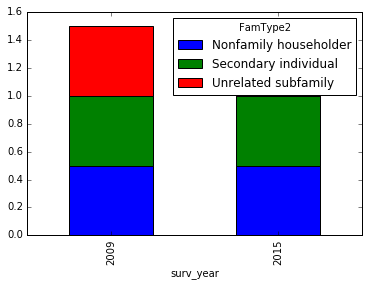

In [22]:
by_LT_FamType2_per2=pt3.T.stack()


#pt3
by_LT_FamType2_per2.unstack().plot.bar(stacked=True)

In [23]:
pt3

surv_year,2009,2015
FamType2,,
Nonfamily householder,0.5,0.5
Secondary individual,0.5,0.5
Unrelated subfamily,0.5,0.5


In [24]:
# 2. Table comparing distribution of emp groups amoung categorical groups


########################################
########################################
## Subtraction results cant be right -- HELP!!!!!!
## Format Percent
## abs() still producing negative values
## cant sort!
########################################
########################################


pt4=pt3


pt4['End2015vs2009']=(pt4['2009']-pt4['2015']).abs()


del pt4['2009']
del pt4['2015']

pt5=pt4.stack()
#pt5.sort_values(axis=0)
print(pt5)

FamType2               surv_year    
Nonfamily householder  End2015vs2009    0.0
Secondary individual   End2015vs2009    0.0
Unrelated subfamily    End2015vs2009    0.0
dtype: float64


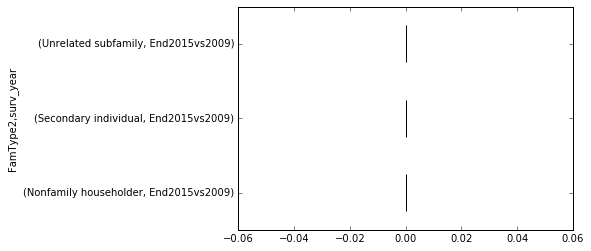

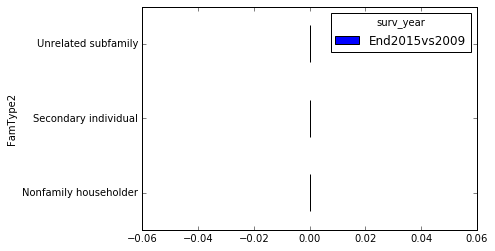

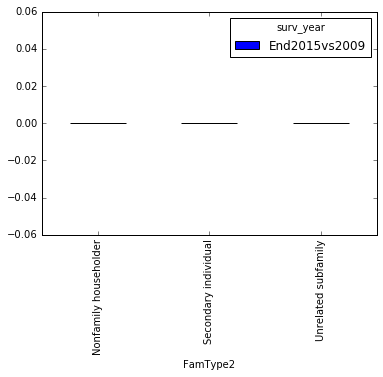

In [26]:
# 3. Graphs comparing distribution of emp groups amoung categorical groups


########################################
########################################
## I want a difference graph -- HELP!!!!!!
## I need to format graphs -- HELP!!!!!!
########################################
########################################



by_LT_FamType2_per2=pt3.stack()


#pt3
by_LT_FamType2_per2.plot(kind='barh')
by_LT_FamType2_per2.unstack().plot(kind='barh')
by_LT_FamType2_per2.unstack().plot.bar(stacked=True)


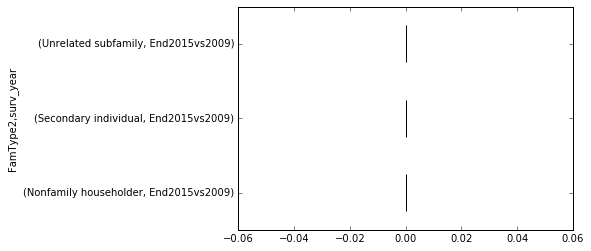

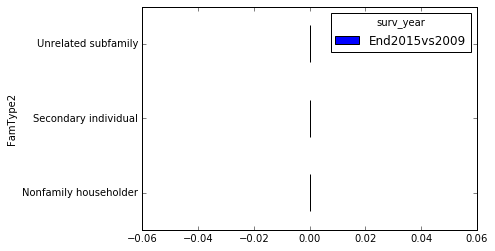

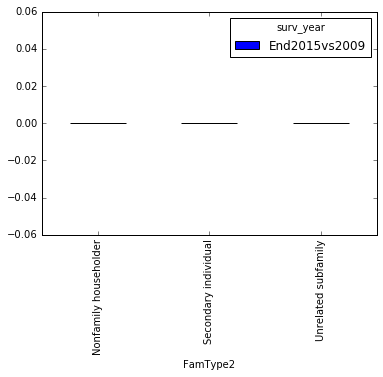

In [27]:
by_LT_FamType2_per2=pt3.stack()


#pt3
by_LT_FamType2_per2.plot(kind='barh')
by_LT_FamType2_per2.unstack().plot(kind='barh')
by_LT_FamType2_per2.unstack().plot.bar(stacked=True)

surv_year  FamType2             
2009       Nonfamily householder    0.820896
           Secondary individual     0.164179
           Unrelated subfamily      0.014925
2015       Nonfamily householder    0.820896
           Secondary individual     0.164179
           Unrelated subfamily      0.014925
dtype: float64
FamType2   Nonfamily householder  Secondary individual  Unrelated subfamily
surv_year                                                                  
2009                    0.820896              0.164179             0.014925
2015                    0.820896              0.164179             0.014925
surv_year              2009  2015
FamType2                         
Nonfamily householder   0.5   0.5
Secondary individual    0.5   0.5
Unrelated subfamily     0.5   0.5
FamType2               surv_year    
Nonfamily householder  End2015vs2009    0.0
Secondary individual   End2015vs2009    0.0
Unrelated subfamily    End2015vs2009    0.0
dtype: float64


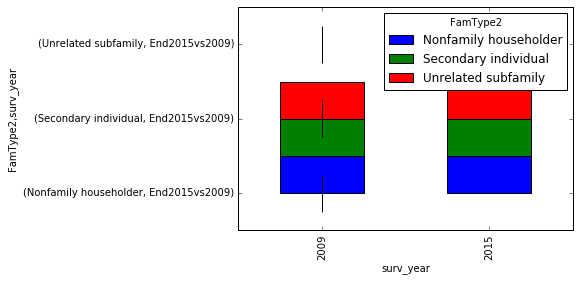

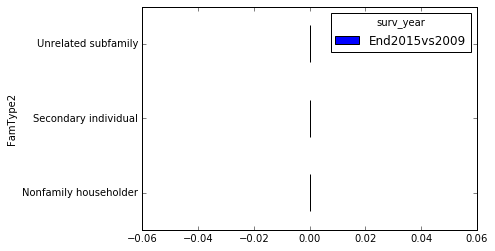

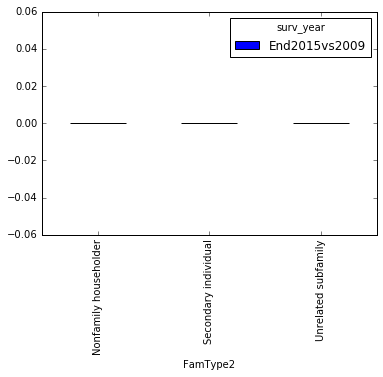

In [28]:
# all together
########################################
########################################
## would like to sort this -- HELP!!!!!!
## Ill do this for both lt and st.  maybe all on 1 graph.  not for now
########################################
########################################


#1. Table Percent of emp group belongs to each categorical group


df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']
LT_FamType2=df_LT.loc[:,['FamType2','surv_year']]


pt2=pd.pivot_table(LT_FamType2,index=['surv_year'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']


by_LT_FamType2_per2=pt3.stack()
by_LT_FamType2_per2

# want to sort by percent.  How?  says not w categorical
# maybe concatenate year and fam type
by_LT_FamType2_per2.sort_values(axis=0, ascending=False)

##############################################33

pt2=pd.pivot_table(LT_FamType2,index=['surv_year'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
by_LT_FamType2_per2=pt3.stack()

print(by_LT_FamType2_per2)
print(pt3)

##################################################33
###############################################3333
## Would like to add up the category, not year
## but category is variable, you can perform operations like sum
##################################################33
###############################################3333

pt2=pd.pivot_table(LT_FamType2,index=['FamType2'],columns='surv_year',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
by_LT_FamType2_per2=pt3.stack()

print(pt3)

by_LT_FamType2_per2=pt3.T.stack()


#pt3
by_LT_FamType2_per2.unstack().plot.bar(stacked=True)

# 2. Table comparing distribution of emp groups amoung categorical groups

#### percent difference tables

########################################
########################################
## Subtraction results cant be right -- HELP!!!!!!
## Format Percent
## abs() still producing negative values
## cant sort!
########################################
########################################

#pt4=pt3.T
pt4=pt3

pt4['End2015vs2009']=(pt4['2009']-pt4['2015']).abs()


del pt4['2009']
del pt4['2015']


pt5=pt4.stack()
#pt5.sort_values(axis=0)
print(pt5)


# 3. Graphs comparing distribution of emp groups amoung categorical groups


########################################
########################################
## I want a difference graph -- HELP!!!!!!
## I need to format graphs -- HELP!!!!!!
########################################
########################################


by_LT_FamType2_per2=pt3.stack()


#pt3
by_LT_FamType2_per2.plot(kind='barh')
by_LT_FamType2_per2.unstack().plot(kind='barh')
by_LT_FamType2_per2.unstack().plot.bar(stacked=True)




FamType2   Nonfamily householder  Secondary individual  Unrelated subfamily
surv_year                                                                  
2009                    0.820896              0.164179             0.014925
2015                    0.820896              0.164179             0.014925
surv_year              2009  2015
FamType2                         
Nonfamily householder   0.5   0.5
Secondary individual    0.5   0.5
Unrelated subfamily     0.5   0.5
FamType2               surv_year    
Nonfamily householder  End2015vs2009    0.0
Secondary individual   End2015vs2009    0.0
Unrelated subfamily    End2015vs2009    0.0
dtype: float64


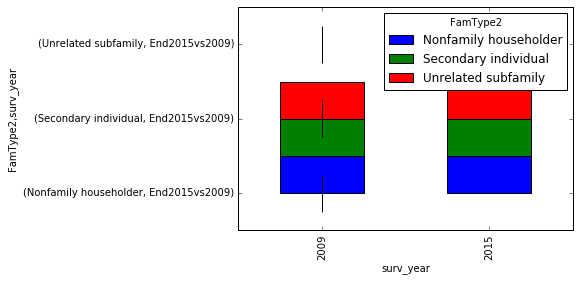

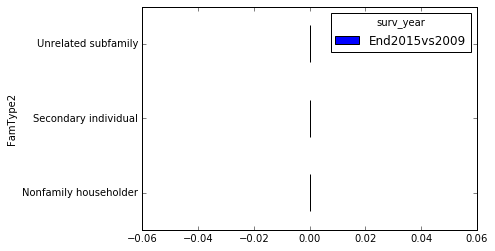

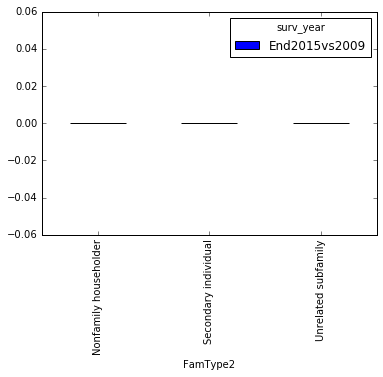

In [29]:
############3
#
#  tables are missing.  do ever line I need something?  do functions work over cells?
#
######################3

# family categorical graphs macro
def grfEDActeFam2(cvarn):
    
    # all together
    ########################################
    ########################################
    ## would like to sort this -- HELP!!!!!!
    ## Ill do this for both lt and st.  maybe all on 1 graph.  not for now
    ########################################
    ########################################


    #1. Table Percent of emp group belongs to each categorical group


    df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']
    LT_cvarn=df_LT.loc[:,[cvarn,'surv_year']]


    pt2=pd.pivot_table(LT_cvarn,index=['surv_year'],columns=cvarn,aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']


    by_LT_cvarn_per2=pt3.stack()
    by_LT_cvarn_per2

    # want to sort by percent.  How?  says not w categorical
    # maybe concatenate year and fam type
    by_LT_cvarn_per2.sort_values(axis=0, ascending=False)

    ##############################################33

    pt2=pd.pivot_table(LT_cvarn,index=['surv_year'],columns=cvarn,aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']
    by_LT_cvarn_per2=pt3.stack()

    print(pt3)
    by_LT_cvarn_per2
    ##################################################33
    ###############################################3333
    ## Would like to add up the category, not year
    ## but category is variable, you can perform operations like sum
    ##################################################33
    ###############################################3333

    # try transpose
    pt2=pd.pivot_table(LT_cvarn,index=[cvarn],columns='surv_year',aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']
    by_LT_cvarn_per2=pt3.stack()

    print(pt3)

    by_LT_cvarn_per2=pt3.T.stack()


    by_LT_cvarn_per2.unstack().plot.bar(stacked=True)


    # 2. Table comparing distribution of emp groups amoung categorical groups


    #### percent difference tables/graphs

    ########################################
    ########################################
    ## Subtraction results cant be right -- HELP!!!!!!
    ## Format Percent
    ## abs() still producing negative values
    ## cant sort!
    ########################################
    ########################################


    pt4['End2015vs2009']=(pt4['2009']-pt4['2015']).abs()


    del pt4['2009']
    del pt4['2015']


    pt5=pt4.stack()
    #pt5.sort_values(axis=0)
    print(pt5)


    # 3. Graphs comparing distribution of emp groups amoung categorical groups


    ########################################
    ########################################
    ## I want a difference graph -- HELP!!!!!!
    ## I need to format graphs -- HELP!!!!!!
    ########################################
    ########################################


    by_LT_cvarn_per2=pt3.stack()


    #pt3
    by_LT_cvarn_per2.plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot.bar(stacked=True)
    #then delete tables
    
grfEDActeFam2('FamType2')

In [ ]:
'''
def grfEDActeFam(carn):
    df_cvarn_2y=df_2y
    #df_cvarn_2y = df_cvarn_2y[df_cvarn_2y[cvarn].notnull()]
    #df_cvarn_2y[cvarn] = df_cvarn_2y[cvarn].astype('str')
    LT_cvarn=df_cvarn_2y.loc[:,['Emp_Group2',cvarn]]
    pt2=pd.pivot_table(LT_cvarn,index=['Emp_Group2'],columns=cvarn,aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']
    by_LT_cvarn_per2=pt3.stack()
    by_LT_cvarn_per2.plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot.bar(stacked=True)
    del df_cvarn_2y
    del LT_cvarn
    del pt2
    del pt3
    del by_LT_cvarn_per2

#grfEDActeFam('FamType2')
grfEDActeFam('FamType2')
'''

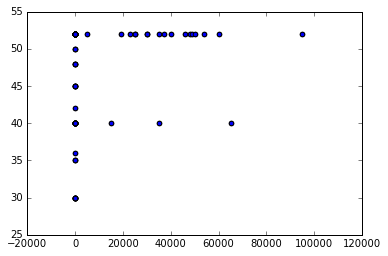

In [38]:
###################3
#
#  Numeric do same things, both years
#

# 1. Scatter dot plot

###############33
#
#  were did my corr coeff
#
########################3


#######################33
#
#  later short term.  maybe line up graphs next to each other
#
# df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']
#############################3

#df_LT['wagesFamInc3'] = df_LT['wagesFamInc'].astype('int')

df_2y['wagesFamInc3'] = df_2y['wagesFamInc'].astype('int')
df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']

df15LT=df_LT[df_LT['surv_year']=='2015']
df09LT=df_LT[df_LT['surv_year']=='2009']

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

# 2015
ax.scatter(df15LT['wagesFamInc3'],df15LT['nwlkwk'])
#plt.show()
#ax.scatter.show()
#scatter.show()

# 2009
ax.scatter(df09LT['wagesFamInc3'],df09LT['nwlkwk'])
plt.show()

#####################33

([array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09]),
  array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09])],
 array([       0. ,   109999.9,   219999.8,   329999.7,   439999.6,
          549999.5,   659999.4,   769999.3,   879999.2,   989999.1,
         1099999. ]),
 <a list of 2 Lists of Patches objects>)

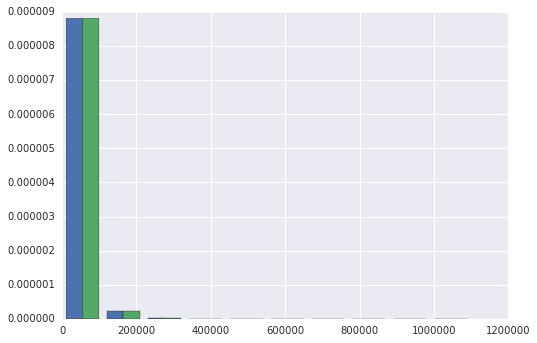

In [40]:

#####################33
#
# How do i show multiple?
#
########################3

#################################33
#  also im missing basic descriptive stats
#  also how use weight?
##########33

# transfer down --  great orig graphs
# Histogram to compare the age distribution of the long-term unemployed and the rest of the population
# age LongTerm vs rest
#####
# ? no error when keep this beginning statement used elsewhere?
# repetitive
############

df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')


LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

LTUmp09x=LTUmp09['wagesFamInc4']
LTUmp15x=LTUmp15['wagesFamInc4']

plt.hist([LTUmp15x,LTUmp09x], normed=True)



In [ ]:
######################################3
#3. boxplots

import seaborn as sns 

sns.boxplot(x=df_2y['surv_year'], y=df_2y['wagesFamInc4'])
sns.despine()

# Histogram to compare the age distribution of the long-term unemployed and the rest of the population [WORKS!!!]

LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

LTUmp09x=LTUmp09['wagesFamInc4']
LTUmp15x=LTUmp15['wagesFamInc4']

plt.hist([LTUmp09x,LTUmp09x], normed=True)
plt.hist([LTUmp15x,LTUmp15x], normed=True)



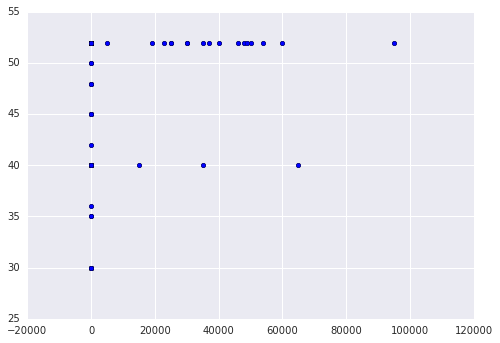

In [42]:
###################3
#
#  Numeric do same things, both years
#

# 1. Scatter dot plot

###############33
#
#  were did my corr coeff
#
########################3


#######################33
#
#  later short term.  maybe line up graphs next to each other
#
# df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']
#############################3

#df_LT['wagesFamInc3'] = df_LT['wagesFamInc'].astype('int')

df_2y['wagesFamInc3'] = df_2y['wagesFamInc'].astype('int')
df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']

df15LT=df_LT[df_LT['surv_year']=='2015']
df09LT=df_LT[df_LT['surv_year']=='2009']

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

# 2015
ax.scatter(df15LT['wagesFamInc3'],df15LT['nwlkwk'])
#plt.show()
#ax.scatter.show()
#scatter.show()

# 2009
ax.scatter(df09LT['wagesFamInc3'],df09LT['nwlkwk'])
plt.show()

#####################33

# how to eliminate border dots??


([array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09]),
  array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09])],
 array([       0. ,   109999.9,   219999.8,   329999.7,   439999.6,
          549999.5,   659999.4,   769999.3,   879999.2,   989999.1,
         1099999. ]),
 <a list of 2 Lists of Patches objects>)

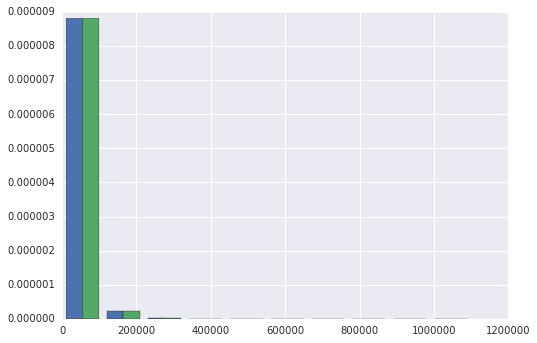

In [43]:

#####################33
#
# How do i show multiple?
#
########################3

#################################33
#  also im missing basic descriptive stats
#  also how use weight?
##########33

# transfer down --  great orig graphs
# Histogram to compare the age distribution of the long-term unemployed and the rest of the population
# age LongTerm vs rest
#####
# ? no error when keep this beginning statement used elsewhere?
# repetitive
############

df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')


LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

LTUmp09x=LTUmp09['wagesFamInc4']
LTUmp15x=LTUmp15['wagesFamInc4']

plt.hist([LTUmp15x,LTUmp09x], normed=True)


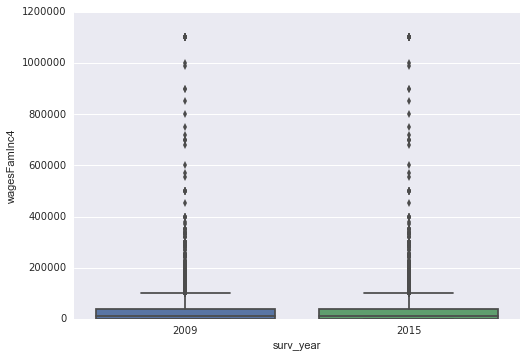

In [44]:

######################################3
#3. boxplots
# df8.boxplot('wagesFamInc4')

import seaborn as sns 

sns.boxplot(x=df_2y['surv_year'], y=df_2y['wagesFamInc4'])
sns.despine()


([array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09]),
  array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09])],
 array([       0. ,   109999.9,   219999.8,   329999.7,   439999.6,
          549999.5,   659999.4,   769999.3,   879999.2,   989999.1,
         1099999. ]),
 <a list of 2 Lists of Patches objects>)

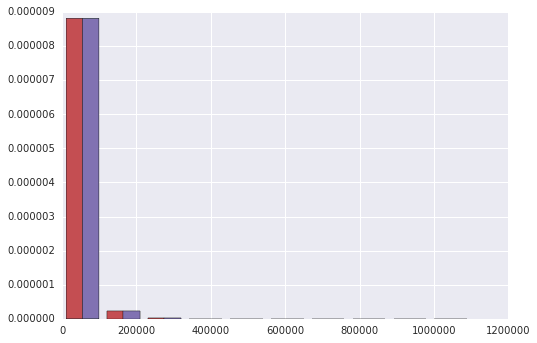

In [45]:

# Histogram to compare the age distribution of the long-term unemployed and the rest of the population [WORKS!!!]

# age LongTerm vs rest


LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

LTUmp09x=LTUmp09['wagesFamInc4']
LTUmp15x=LTUmp15['wagesFamInc4']

plt.hist([LTUmp09x,LTUmp09x], normed=True)


plt.hist([LTUmp15x,LTUmp15x], normed=True)



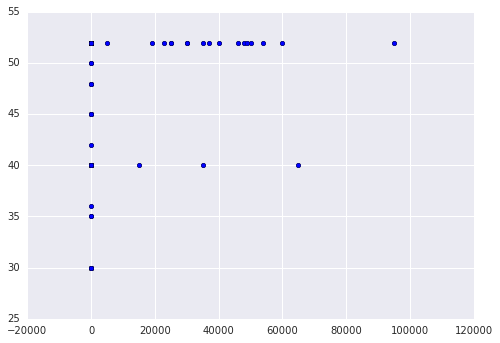

([array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09]),
  array([  8.81039612e-06,   2.40259725e-07,   2.16037355e-08,
           6.87391583e-09,   2.29130528e-09,   9.81987976e-10,
           1.96397595e-09,   6.54658651e-10,   6.54658651e-10,
           5.23726921e-09])],
 array([       0. ,   109999.9,   219999.8,   329999.7,   439999.6,
          549999.5,   659999.4,   769999.3,   879999.2,   989999.1,
         1099999. ]),
 <a list of 2 Lists of Patches objects>)

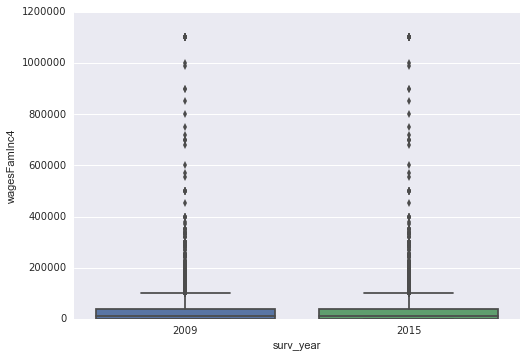

In [46]:
###################3
#
#  Numeric do same things, both years
#

# 1. Scatter dot plot

###############33
#
#  were did my corr coeff go
#
########################3


#######################33
#
#  later short term.  maybe line up graphs next to each other
#
#############################3


df_2y['wagesFamInc3'] = df_2y['wagesFamInc'].astype('int')
df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']

df15LT=df_LT[df_LT['surv_year']=='2015']
df09LT=df_LT[df_LT['surv_year']=='2009']

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

# 2015
ax.scatter(df15LT['wagesFamInc3'],df15LT['nwlkwk'])
#plt.show()
#ax.scatter.show()
#scatter.show()

# 2009
ax.scatter(df09LT['wagesFamInc3'],df09LT['nwlkwk'])
plt.show()

#####################33


#####################33
#
# How do i show multiple?
#
########################3

#################################33
#  also im missing basic descriptive stats
#  also how use weight?
##########33

# transfer down --  great orig graphs
# Histogram to compare the age distribution of the long-term unemployed and the rest of the population
# age LongTerm vs rest
#####
# ? no error when keep this beginning statement used elsewhere?
# repetitive
############

df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')


LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

LTUmp09x=LTUmp09['wagesFamInc4']
LTUmp15x=LTUmp15['wagesFamInc4']

plt.hist([LTUmp15x,LTUmp09x], normed=True)

######################################3
#3. boxplots
# df8.boxplot('wagesFamInc4')

import seaborn as sns 

sns.boxplot(x=df_2y['surv_year'], y=df_2y['wagesFamInc4'])
sns.despine()

# Histogram to compare the age distribution of the long-term unemployed and the rest of the population [WORKS!!!]



LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

LTUmp09x=LTUmp09['wagesFamInc4']
LTUmp15x=LTUmp15['wagesFamInc4']

plt.hist([LTUmp09x,LTUmp09x], normed=True)


plt.hist([LTUmp15x,LTUmp15x], normed=True)



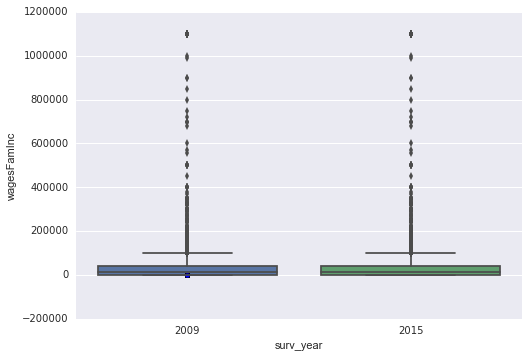

In [49]:
def grfEDAyr(cvarn):
    df_2y[cvarn] = df_2y[cvarn].astype('int')
    df_LT=df_2y[df_2y['Emp_Group2']=='LongTerm']

    df15LT=df_LT[df_LT['surv_year']=='2015']
    df09LT=df_LT[df_LT['surv_year']=='2009']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    # 2015
    ax.scatter(df15LT[cvarn],df15LT['nwlkwk'])

    # 2009
    ax.scatter(df09LT['wagesFamInc3'],df09LT['nwlkwk'])

    #########################################33

    #df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')


    #LTUmp09 = df_2y[df_2y['surv_year'] == '2009']
    #LTUmp15 = df_2y[df_2y['surv_year'] == '2015']

    df15LTx=LTUmp09[cvarn]
    df09LTx=LTUmp15[cvarn]

    plt.hist([LTUmp15x,LTUmp09x], normed=True)

    ######################################3
    #3. boxplots
    # df8.boxplot('wagesFamInc4')

    import seaborn as sns 

    sns.boxplot(x=df_2y['surv_year'], y=df_2y[cvarn])
    sns.despine()


    
grfEDAyr('wagesFamInc')